In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_init = pd.read_csv('results/[initial] score_alignment_4o_default.csv')
df_middle = pd.read_csv('results/[first improvement 2] score_alignment_4o_mini_improved_promt.csv')
df_final = pd.read_csv('results/[final] criteria_alignments_seperate_pipeline_new_test_set.csv')
df_add = pd.read_csv('results/criteria_alignments_20241212_103915.csv')

display(df_init.head())
display(df_middle.head())
display(df_final.head())
display(df_add.head())

,id,Question,Calculated Rating,Actual Rating
0,1,"Frage (2012, Aufgabe 5.1.1)\r\nDie steuerpflic...",0.3,0.4
1,2,"Frage (2012, Aufgabe 5.1.2)\r\nDie in der Schw...",0.9,0.9
2,3,"Frage (2012, Aufgabe 5.1.3)\r\nDie in England ...",0.2,0.3
3,4,"Frage (2012, Aufgabe 5.2.1) \r\n\r\nDie steuer...",0.3,0.8
4,5,"Frage (2012, Aufgabe 5.2.2) \r\nDie Immo AG be...",0.3,0.6


,id,Question,Calculated Rating,Actual Rating
0,1,"Frage (2012, Aufgabe 5.1.1)\r\nDie steuerpflic...",0.4,0.4
1,2,"Frage (2012, Aufgabe 5.1.2)\r\nDie in der Schw...",0.7,0.9
2,3,"Frage (2012, Aufgabe 5.1.3)\r\nDie in England ...",0.3,0.3
3,4,"Frage (2012, Aufgabe 5.2.1) \r\n\r\nDie steuer...",0.4,0.8
4,5,"Frage (2012, Aufgabe 5.2.2) \r\nDie Immo AG be...",0.6,0.6


,id,Calculated Rating,Actual Rating,C1 Score,C2 Score,C3 Score,C4 Score
0,28.0,0.60,0.6,3.0,3.0,4.0,2.0
1,17.0,0.55,0.5,2.0,2.0,5.0,2.0
2,12.0,0.85,0.9,4.0,4.0,4.0,5.0
3,29.0,0.75,0.9,3.0,4.0,4.0,4.0
4,8.0,0.80,0.3,3.0,3.0,5.0,5.0


Ratio of points within ±0.2: 0.59,   length: 44
Bias: -0.21
Ratio of points within ±0.2: 0.52,   length: 44
Bias: -0.17
Ratio of points within ±0.2: 0.83,   length: 41
Bias: 0.00


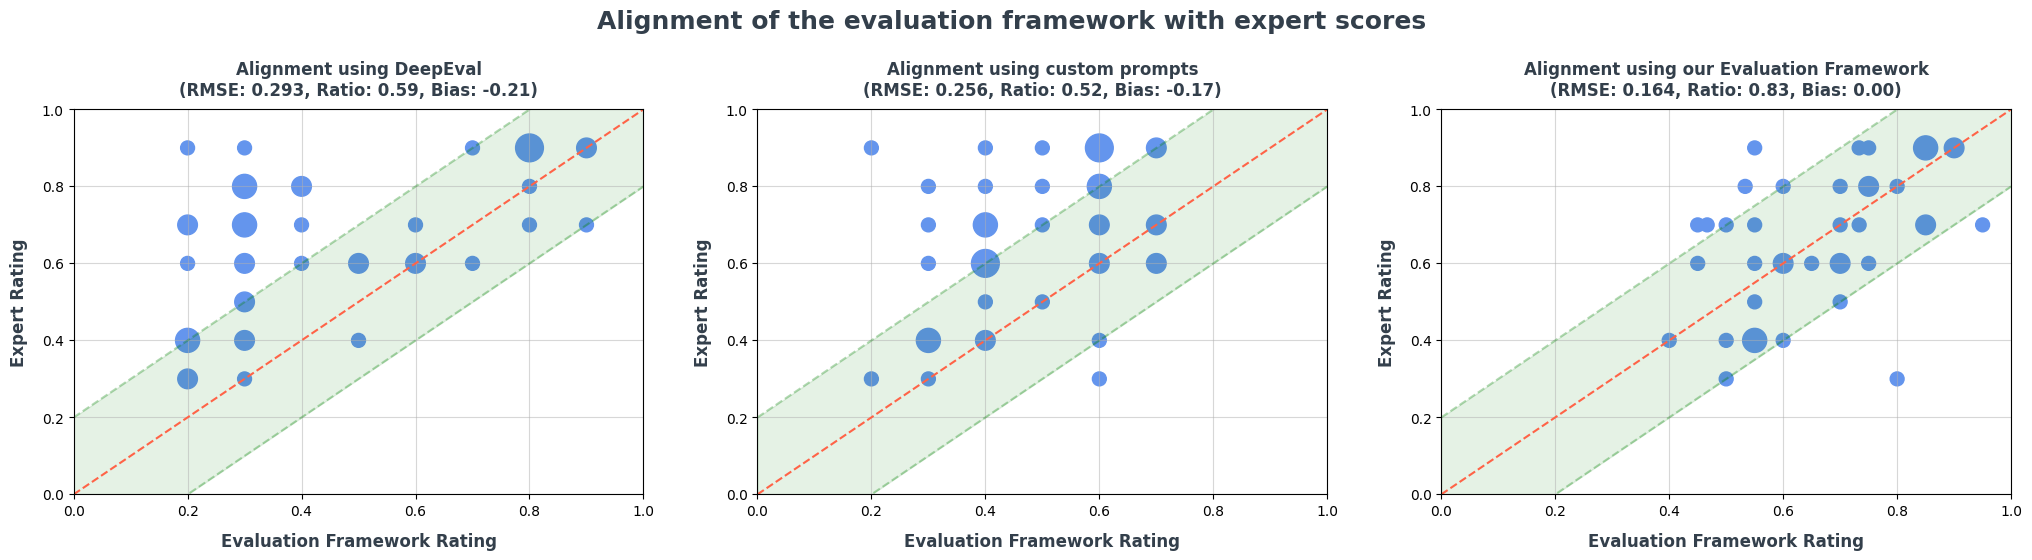

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

delta = 0.2


def plot_buble_chart(df, ax, title=""):
    df_plot = df[['Calculated Rating', 'Actual Rating']]
    counts = df_plot.value_counts().reset_index(name="Count")

    # print the ratio of points which absolute value is below 0.2
    ratio = len(df_plot[(df_plot['Calculated Rating'] - df_plot['Actual Rating']).abs() <= 0.20]) / len(df_plot)
    print(f"Ratio of points within ±0.2: {ratio:.2f},   length: {len(df_plot)}")

    # bias
    bias = (df_plot['Calculated Rating'] - df_plot['Actual Rating']).mean()
    print(f"Bias: {bias:.2f}")

    ax.scatter(counts['Calculated Rating'], counts['Actual Rating'], s=counts['Count']*100, alpha=1, color='cornflowerblue')  # Scale size by count
    ax.plot([0, 1], [0, 1], color='tomato', linestyle='--', alpha=1)
    ax.plot([0, 1], [delta, 1 + delta], color='green', linestyle='--', alpha=0.3, label="Upper Bound (+0.2)")
    ax.plot([0, 1], [-delta, 1 - delta], color='green', linestyle='--', alpha=0.3, label="Lower Bound (-0.2)")
    ax.fill_between([0, 1], [-delta, 1 - delta], [delta, 1 + delta], color='green', alpha=0.1, label="Error Band (±0.2)")
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Evaluation Framework Rating", fontsize=12, fontweight='bold', labelpad=10, color='#333F4B')
    ax.set_ylabel("Expert Rating", fontsize=12, fontweight='bold', labelpad=10, color='#333F4B')
    ax.set_title(title, fontsize=12, fontweight='bold', color='#333F4B', pad=10)
    ax.grid(True)
    ax.grid(alpha=0.5)




# first plot
plot_buble_chart(df_init, axs[0], title="Alignment using DeepEval\n(RMSE: 0.293, Ratio: 0.59, Bias: -0.21)")

# second plot
plot_buble_chart(df_middle, axs[1], title="Alignment using custom prompts\n(RMSE: 0.256, Ratio: 0.52, Bias: -0.17)")

# fourth plot
plot_buble_chart(df_add, axs[2], title="Alignment using our Evaluation Framework (combinded)\n(RMSE: 0.184, Ratio: 0.68, Bias: -0.01)")

# third plot
plot_buble_chart(df_final, axs[3], title="Alignment using our Evaluation Framework\n(RMSE: 0.164, Ratio: 0.83, Bias: 0.00)")



plt.suptitle("Alignment of the evaluation framework with expert scores", fontsize=18, fontweight='bold', color='#333F4B', y=1.08)
plt.savefig('score_alignment_illustration.png', bbox_inches='tight')
plt.show()


#df_plot_2 = df[['id', 'Calculated Rating', 'Actual Rating']]
#df_plot_2['Difference'] = df_plot_2['Calculated Rating'] - df_plot_2['Actual Rating']
#df_plot_2['Color'] = df_plot_2['Color'] = np.where(df_plot_2['Difference'] > 0, 'blue', 'red')

#plt.figure(figsize=(8, 6))
#plt.bar(df_plot_2['id'], df_plot_2['Difference'], color=df_plot_2['Color'])
#plt.ylim(-1, 1)
#plt.xlabel("id")
#plt.ylabel("Difference")
#plt.title("Difference between Calculated and Actual Ratings")
#plt.show()




# Calculate the RMSE
#rmse = ((df['Calculated Rating'] - df['Actual Rating'])**2).mean()
#print(f"RMSE: {rmse}")

In [ ]:
df2 = pd.read_csv('results/score_alignment_4o_default.csv')
df2

In [ ]:
# Count occurrences of each (score1, score2) pair
df_plot = df2[['Calculated Rating', 'Actual Rating']].copy()
#df_plot['Calculated Rating'] = df_plot['Actual Rating']
counts = df_plot.value_counts().reset_index(name="Count")

plt.figure(figsize=(8, 6))
plt.scatter(counts['Calculated Rating'], counts['Actual Rating'], s=counts['Count']*100, alpha=1)  # Scale size by count
plt.plot([0, 1], [0, 1], color='red', linestyle='--', alpha=1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Calculated Rating")
plt.ylabel("Actual Rating")
plt.title("Bubble Plot (Point Size by Count)")
#plt.grid(True)
plt.show()




# Calculate the RMSE
rmse = ((df2['Calculated Rating'] - df2['Actual Rating'])**2).mean()
print(f"RMSE: {rmse}")